In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=34) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_GrayScale_12_Out-127                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.50
Params size (MB): 83.17
Estimated Total Size (MB): 280.07
----------------------------------------------------------------


In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net)

Number of Training Images: 105,597
Number of Validation Images: 26,151


In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 981.4133         
Training Time: 0:20:49.899813          
Validation Time: 0:02:40.555776

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.102760,0.556772,0.173499,0.781702,0.344825
4,Edema,24469,0.217500,0.548434,0.311474,0.763976,0.465041
5,Consolidation,6397,0.000000,0.000000,0.000000,0.650814,0.095976
7,Atelectasis,16577,0.000181,0.085714,0.000361,0.600076,0.200921
9,Pleural_Effusion,36048,0.528934,0.656396,0.585812,0.796401,0.656671



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.205535,0.622699,0.309059,0.827850,0.442867
4,Edema,6030,0.256385,0.619888,0.362740,0.803483,0.527012
5,Consolidation,1526,0.000000,0.000000,0.000000,0.691791,0.111581
7,Atelectasis,4041,0.000000,0.000000,0.000000,0.653173,0.234303
9,Pleural_Effusion,8686,0.686277,0.676694,0.681452,0.848522,0.726690


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 938.0344         
Training Time: 0:20:26.020642          
Validation Time: 0:02:35.630958

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.200135,0.614470,0.301930,0.827404,0.432057
4,Edema,24469,0.295517,0.583851,0.392413,0.793669,0.507264
5,Consolidation,6397,0.000000,0.000000,0.000000,0.685847,0.111635
7,Atelectasis,16577,0.000000,0.000000,0.000000,0.631942,0.221835
9,Pleural_Effusion,36048,0.624112,0.698370,0.659156,0.841526,0.722693



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.255484,0.580521,0.354816,0.833804,0.454869
4,Edema,6030,0.222222,0.638399,0.329684,0.809351,0.527865
5,Consolidation,1526,0.000000,0.000000,0.000000,0.701745,0.117528
7,Atelectasis,4041,0.000000,0.000000,0.000000,0.644004,0.232415
9,Pleural_Effusion,8686,0.681211,0.695872,0.688464,0.859520,0.743791


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 921.1446         
Training Time: 0:20:27.186531          
Validation Time: 0:02:36.078775

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.226982,0.624595,0.332963,0.838311,0.456558
4,Edema,24469,0.323511,0.593537,0.418770,0.803408,0.526925
5,Consolidation,6397,0.000000,0.000000,0.000000,0.701586,0.120838
7,Atelectasis,16577,0.000000,0.000000,0.000000,0.645436,0.230026
9,Pleural_Effusion,36048,0.647026,0.710188,0.677137,0.853359,0.743124



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.281809,0.630665,0.389550,0.850033,0.484034
4,Edema,6030,0.153234,0.661417,0.248822,0.812683,0.532934
5,Consolidation,1526,0.000000,0.000000,0.000000,0.708187,0.117005
7,Atelectasis,4041,0.000000,0.000000,0.000000,0.668551,0.245479
9,Pleural_Effusion,8686,0.549044,0.755665,0.635994,0.863266,0.750517


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 909.7264         
Training Time: 0:20:01.493208          
Validation Time: 0:02:36.481695

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.244908,0.626345,0.352130,0.846208,0.472617
4,Edema,24469,0.341698,0.599656,0.435333,0.809885,0.538953
5,Consolidation,6397,0.000156,0.333333,0.000313,0.708570,0.128864
7,Atelectasis,16577,0.000000,0.000000,0.000000,0.655946,0.238657
9,Pleural_Effusion,36048,0.657096,0.714324,0.684516,0.859448,0.751852



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.138036,0.731664,0.232254,0.853425,0.494363
4,Edema,6030,0.243449,0.637706,0.352376,0.820863,0.547192
5,Consolidation,1526,0.000000,0.000000,0.000000,0.727634,0.142986
7,Atelectasis,4041,0.000000,0.000000,0.000000,0.667435,0.251461
9,Pleural_Effusion,8686,0.786898,0.648667,0.711127,0.864831,0.749706


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 900.5826         
Training Time: 0:20:39.539504          
Validation Time: 0:02:38.526229

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.254671,0.637053,0.363877,0.851462,0.488145
4,Edema,24469,0.357309,0.605639,0.449454,0.815430,0.545988
5,Consolidation,6397,0.000156,0.142857,0.000312,0.715674,0.132374
7,Atelectasis,16577,0.000362,0.666667,0.000724,0.663233,0.246732
9,Pleural_Effusion,36048,0.668054,0.720069,0.693087,0.864127,0.760252



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.414445,0.554152,0.474223,0.854938,0.496686
4,Edema,6030,0.172803,0.672692,0.274970,0.821258,0.551817
5,Consolidation,1526,0.001311,0.181818,0.002602,0.729258,0.150848
7,Atelectasis,4041,0.000495,0.333333,0.000988,0.678837,0.260776
9,Pleural_Effusion,8686,0.757195,0.670029,0.710950,0.868585,0.760060


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 893.9706         
Training Time: 0:20:34.971714          
Validation Time: 0:02:36.484687

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.265864,0.643512,0.376273,0.855791,0.490150
4,Edema,24469,0.368793,0.610307,0.459763,0.818750,0.556219
5,Consolidation,6397,0.000000,0.000000,0.000000,0.722811,0.138589
7,Atelectasis,16577,0.000362,0.352941,0.000723,0.668686,0.251047
9,Pleural_Effusion,36048,0.672659,0.724275,0.697513,0.868028,0.766586



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.351333,0.587804,0.439797,0.856543,0.494867
4,Edema,6030,0.672637,0.501980,0.574911,0.825890,0.561360
5,Consolidation,1526,0.009830,0.217391,0.018809,0.726997,0.146228
7,Atelectasis,4041,0.011383,0.403509,0.022142,0.674732,0.260475
9,Pleural_Effusion,8686,0.686507,0.706015,0.696124,0.867589,0.754801


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 887.0996         
Training Time: 0:20:17.287007          
Validation Time: 0:02:36.104732

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.279078,0.647151,0.389980,0.859175,0.505570
4,Edema,24469,0.379296,0.613133,0.468666,0.821740,0.560994
5,Consolidation,6397,0.000313,0.500000,0.000625,0.726654,0.144003
7,Atelectasis,16577,0.000784,0.650000,0.001567,0.674521,0.255614
9,Pleural_Effusion,36048,0.679206,0.726420,0.702020,0.870597,0.770059



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.449882,0.553342,0.496277,0.863072,0.511633
4,Edema,6030,0.510116,0.572386,0.539460,0.828392,0.569086
5,Consolidation,1526,0.000000,0.000000,0.000000,0.737503,0.156821
7,Atelectasis,4041,0.000990,0.800000,0.001977,0.678413,0.259305
9,Pleural_Effusion,8686,0.696178,0.715537,0.705724,0.874113,0.770299


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 881.4633         
Training Time: 0:20:20.854453          
Validation Time: 0:02:36.443772

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.286484,0.642507,0.396275,0.862837,0.509538
4,Edema,24469,0.386203,0.619388,0.475759,0.825400,0.570647
5,Consolidation,6397,0.000469,0.300000,0.000936,0.730852,0.146395
7,Atelectasis,16577,0.000845,0.518519,0.001686,0.677524,0.260142
9,Pleural_Effusion,36048,0.683977,0.729230,0.705879,0.872950,0.775313



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.413095,0.576271,0.481227,0.861356,0.512238
4,Edema,6030,0.584577,0.535633,0.559036,0.824894,0.558586
5,Consolidation,1526,0.000000,0.000000,0.000000,0.734847,0.154107
7,Atelectasis,4041,0.004454,0.391304,0.008808,0.688276,0.269102
9,Pleural_Effusion,8686,0.816141,0.646748,0.721637,0.876119,0.769844


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 875.6493         
Training Time: 0:20:31.014269          
Validation Time: 0:02:36.329132

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.296499,0.652287,0.407684,0.864198,0.518237
4,Edema,24469,0.397891,0.618866,0.484366,0.828848,0.572804
5,Consolidation,6397,0.000625,0.333333,0.001248,0.737973,0.152345
7,Atelectasis,16577,0.001448,0.545455,0.002888,0.682014,0.265699
9,Pleural_Effusion,36048,0.685780,0.729190,0.706819,0.875895,0.781224



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.272022,0.666116,0.386293,0.863556,0.518244
4,Edema,6030,0.401990,0.601937,0.482052,0.826204,0.561704
5,Consolidation,1526,0.000000,0.000000,0.000000,0.737161,0.150049
7,Atelectasis,4041,0.001980,0.533333,0.003945,0.690654,0.273502
9,Pleural_Effusion,8686,0.689040,0.722739,0.705487,0.877332,0.771954


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 870.3656         
Training Time: 0:20:02.886460          
Validation Time: 0:02:36.345095

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.310133,0.662889,0.422568,0.868730,0.527484
4,Edema,24469,0.405534,0.627085,0.492542,0.830626,0.579536
5,Consolidation,6397,0.000469,0.230769,0.000936,0.736975,0.151949
7,Atelectasis,16577,0.001870,0.500000,0.003726,0.685299,0.268599
9,Pleural_Effusion,36048,0.691744,0.732744,0.711654,0.877909,0.782464



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.316909,0.640518,0.424023,0.860579,0.508979
4,Edema,6030,0.301493,0.638567,0.409598,0.829488,0.566124
5,Consolidation,1526,0.000000,0.000000,0.000000,0.741223,0.157380
7,Atelectasis,4041,0.004207,0.354167,0.008315,0.692463,0.273778
9,Pleural_Effusion,8686,0.676030,0.723777,0.699089,0.875093,0.769584


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 865.6143         
Training Time: 0:20:29.012649          
Validation Time: 0:02:36.157533

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.312742,0.658982,0.424177,0.869385,0.527944
4,Edema,24469,0.408313,0.624633,0.493822,0.833340,0.582821
5,Consolidation,6397,0.001407,0.428571,0.002805,0.742788,0.159427
7,Atelectasis,16577,0.002353,0.520000,0.004684,0.689095,0.271858
9,Pleural_Effusion,36048,0.694685,0.735664,0.714587,0.879744,0.786328



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.241984,0.692085,0.358590,0.863295,0.522226
4,Edema,6030,0.297678,0.656067,0.409537,0.831722,0.573335
5,Consolidation,1526,0.000655,1.000000,0.001310,0.744584,0.170559
7,Atelectasis,4041,0.000000,0.000000,0.000000,0.690526,0.271149
9,Pleural_Effusion,8686,0.705848,0.709114,0.707477,0.876878,0.775710


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 860.6339         
Training Time: 0:20:28.375348          
Validation Time: 0:02:36.193464

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.320569,0.668832,0.433407,0.872153,0.536600
4,Edema,24469,0.418897,0.631158,0.503574,0.835804,0.586682
5,Consolidation,6397,0.002345,0.441176,0.004665,0.748009,0.162271
7,Atelectasis,16577,0.004162,0.511111,0.008258,0.691891,0.275963
9,Pleural_Effusion,36048,0.698791,0.738883,0.718278,0.882019,0.790344



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.420520,0.552305,0.477486,0.859061,0.503369
4,Edema,6030,0.562852,0.548038,0.555346,0.826462,0.566324
5,Consolidation,1526,0.000655,1.000000,0.001310,0.738217,0.163516
7,Atelectasis,4041,0.015838,0.412903,0.030505,0.687449,0.270468
9,Pleural_Effusion,8686,0.779300,0.667884,0.719303,0.874083,0.769575


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 856.0787         
Training Time: 0:20:30.313173          
Validation Time: 0:02:36.102709

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.328901,0.664061,0.439917,0.874243,0.542034
4,Edema,24469,0.420246,0.632411,0.504947,0.837892,0.592173
5,Consolidation,6397,0.001407,0.428571,0.002805,0.749574,0.164793
7,Atelectasis,16577,0.003680,0.445255,0.007299,0.693894,0.279908
9,Pleural_Effusion,36048,0.702119,0.741034,0.721052,0.883475,0.792933



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.264259,0.673838,0.379636,0.860424,0.510285
4,Edema,6030,0.316915,0.651996,0.426515,0.832409,0.574680
5,Consolidation,1526,0.002621,0.500000,0.005215,0.743016,0.166590
7,Atelectasis,4041,0.004207,0.320755,0.008305,0.693221,0.271081
9,Pleural_Effusion,8686,0.697444,0.712538,0.704910,0.878280,0.774722


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 850.4496         
Training Time: 0:20:07.290695          
Validation Time: 0:02:36.141626

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.333025,0.668751,0.444632,0.875977,0.543564
4,Edema,24469,0.428665,0.633432,0.511309,0.840405,0.598254
5,Consolidation,6397,0.002657,0.447368,0.005284,0.752036,0.165735
7,Atelectasis,16577,0.005429,0.520231,0.010746,0.697722,0.284151
9,Pleural_Effusion,36048,0.706253,0.742786,0.724059,0.886013,0.796520



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.272022,0.673913,0.387593,0.860537,0.516079
4,Edema,6030,0.543781,0.558793,0.551185,0.830429,0.572163
5,Consolidation,1526,0.002621,1.000000,0.005229,0.737780,0.163496
7,Atelectasis,4041,0.003712,0.454545,0.007364,0.693067,0.273250
9,Pleural_Effusion,8686,0.793806,0.663172,0.722633,0.876772,0.776889


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 845.5792         
Training Time: 0:20:29.845417          
Validation Time: 0:02:36.235362

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.348595,0.666023,0.457654,0.879411,0.556721
4,Edema,24469,0.434999,0.635880,0.516599,0.841810,0.602137
5,Consolidation,6397,0.003283,0.456522,0.006519,0.755303,0.173154
7,Atelectasis,16577,0.007903,0.528226,0.015572,0.702824,0.290182
9,Pleural_Effusion,36048,0.708167,0.744474,0.725867,0.887600,0.799440



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.215322,0.697268,0.329036,0.862562,0.513289
4,Edema,6030,0.288723,0.654020,0.400598,0.833077,0.572506
5,Consolidation,1526,0.007864,0.571429,0.015514,0.741564,0.166318
7,Atelectasis,4041,0.007671,0.413333,0.015063,0.693160,0.273247
9,Pleural_Effusion,8686,0.677067,0.720711,0.698207,0.876229,0.770956


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 839.6088         
Training Time: 0:20:16.895013          
Validation Time: 0:02:36.323141

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.353644,0.671568,0.463311,0.881443,0.561959
4,Edema,24469,0.448159,0.642564,0.528037,0.845643,0.609769
5,Consolidation,6397,0.005002,0.432432,0.009890,0.761279,0.180631
7,Atelectasis,16577,0.009833,0.478006,0.019269,0.706074,0.292933
9,Pleural_Effusion,36048,0.712633,0.746253,0.729056,0.889563,0.803654



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.212622,0.707071,0.326933,0.858031,0.510018
4,Edema,6030,0.379104,0.621196,0.470855,0.833131,0.574953
5,Consolidation,1526,0.018349,0.482759,0.035354,0.728953,0.163122
7,Atelectasis,4041,0.005939,0.461538,0.011727,0.690893,0.274026
9,Pleural_Effusion,8686,0.766291,0.681967,0.721674,0.879800,0.778467


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 835.0422         
Training Time: 0:20:19.699549          
Validation Time: 0:02:36.289207

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.363912,0.678913,0.473837,0.883821,0.567523
4,Edema,24469,0.450366,0.642453,0.529528,0.847204,0.613020
5,Consolidation,6397,0.007035,0.523256,0.013882,0.762730,0.185898
7,Atelectasis,16577,0.012668,0.532995,0.024748,0.708929,0.298069
9,Pleural_Effusion,36048,0.717072,0.747924,0.732173,0.891270,0.805825



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.343233,0.601064,0.436950,0.851352,0.496468
4,Edema,6030,0.285572,0.653759,0.397507,0.830414,0.570537
5,Consolidation,1526,0.007208,0.846154,0.014295,0.743663,0.174648
7,Atelectasis,4041,0.009899,0.373832,0.019286,0.685997,0.266072
9,Pleural_Effusion,8686,0.784020,0.664844,0.719531,0.874699,0.771303


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 828.6869         
Training Time: 0:20:30.800863          
Validation Time: 0:02:36.393907

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.376620,0.681541,0.485147,0.886934,0.575481
4,Edema,24469,0.457967,0.646251,0.536057,0.850531,0.618022
5,Consolidation,6397,0.010943,0.530303,0.021443,0.765985,0.193372
7,Atelectasis,16577,0.014116,0.493671,0.027447,0.714245,0.302406
9,Pleural_Effusion,36048,0.718237,0.749313,0.733446,0.893226,0.809420



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.430307,0.563163,0.487852,0.862026,0.515001
4,Edema,6030,0.445274,0.598662,0.510699,0.833416,0.574565
5,Consolidation,1526,0.029489,0.387931,0.054811,0.736170,0.165366
7,Atelectasis,4041,0.006682,0.509434,0.013190,0.690664,0.275013
9,Pleural_Effusion,8686,0.734746,0.703561,0.718815,0.879080,0.776735


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 822.9930         
Training Time: 0:20:30.716089          
Validation Time: 0:02:36.472726

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.378724,0.676488,0.485594,0.890441,0.582664
4,Edema,24469,0.463484,0.648762,0.540691,0.851863,0.621222
5,Consolidation,6397,0.012506,0.597015,0.024499,0.767248,0.193351
7,Atelectasis,16577,0.019666,0.559177,0.037995,0.715817,0.306824
9,Pleural_Effusion,36048,0.723813,0.753212,0.738220,0.895411,0.813002



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.366858,0.597910,0.454717,0.859627,0.509698
4,Edema,6030,0.584411,0.514152,0.547035,0.812897,0.540954
5,Consolidation,1526,0.015072,0.696970,0.029506,0.743135,0.171867
7,Atelectasis,4041,0.001732,0.388889,0.003449,0.688849,0.272741
9,Pleural_Effusion,8686,0.709417,0.710399,0.709908,0.878384,0.777202


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 817.0160         
Training Time: 0:20:05.501470          
Validation Time: 0:02:36.286241

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11882,0.383774,0.684171,0.491724,0.891645,0.588096
4,Edema,24469,0.473252,0.655831,0.549779,0.855058,0.628677
5,Consolidation,6397,0.012819,0.496970,0.024992,0.775442,0.199403
7,Atelectasis,16577,0.021355,0.528358,0.041051,0.719842,0.312196
9,Pleural_Effusion,36048,0.723924,0.755180,0.739222,0.896875,0.815942



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2963,0.388795,0.579477,0.465361,0.858612,0.510891
4,Edema,6030,0.311443,0.651631,0.421454,0.832037,0.572352
5,Consolidation,1526,0.013106,0.714286,0.025740,0.750838,0.178164
7,Atelectasis,4041,0.022767,0.388186,0.043011,0.691618,0.269640
9,Pleural_Effusion,8686,0.633433,0.752668,0.687922,0.879419,0.777972



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.295633
Hamming Loss,0.100848
Combined Recall,0.363840
Combined Precision,0.436239
Combined F1,0.374241


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5395,0.045783,0.612903,0.085202,0.735294,0.208339
1,Cardiomegaly,11882,0.383774,0.684171,0.491724,0.891645,0.588096
2,Lung_Opacity,48086,0.687622,0.651142,0.668885,0.757897,0.692407
3,Lung_Lesion,4417,0.073579,0.643564,0.132060,0.816706,0.256684
4,Edema,24469,0.473252,0.655831,0.549779,0.855058,0.628677
5,Consolidation,6397,0.012819,0.496970,0.024992,0.775442,0.199403
6,Pneumonia,2818,0.011356,0.653061,0.022323,0.788049,0.138856
7,Atelectasis,16577,0.021355,0.528358,0.041051,0.719842,0.312196
8,Pneumothorax,8480,0.324057,0.693064,0.441623,0.890123,0.535979
9,Pleural_Effusion,36048,0.723924,0.755180,0.739222,0.896875,0.815942


***** ROC *****


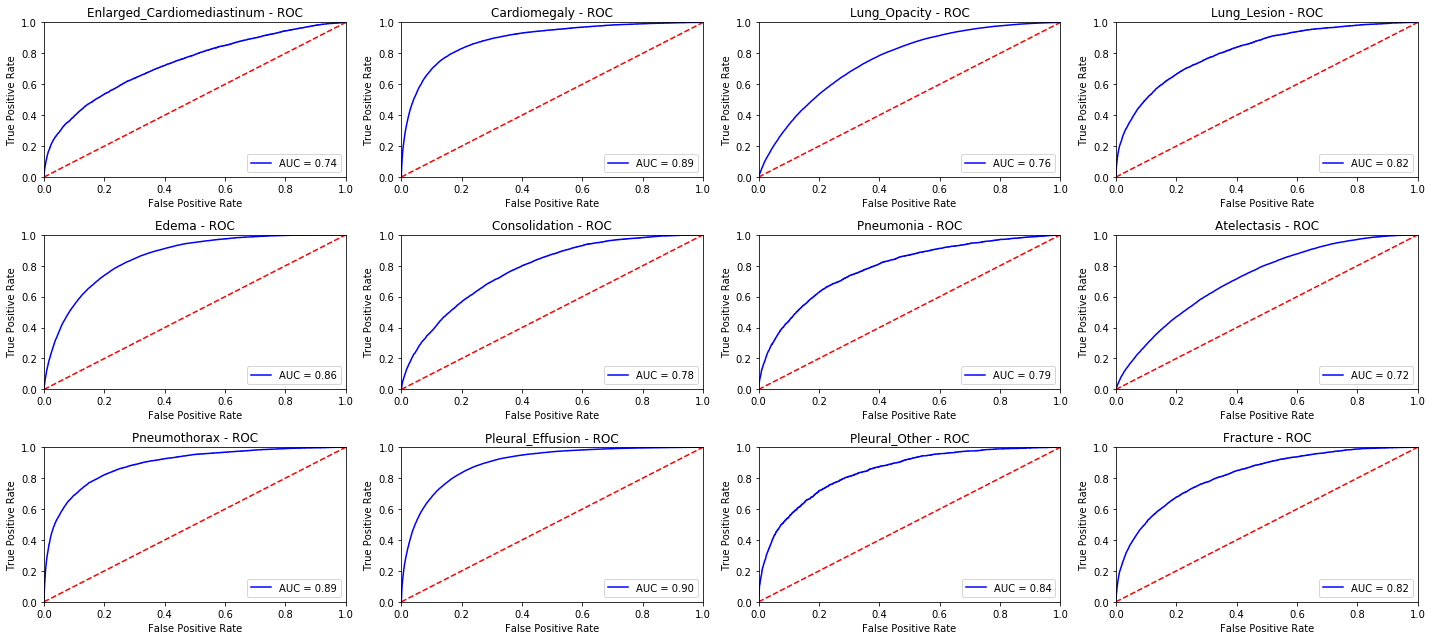

***** Precision / Recall *****


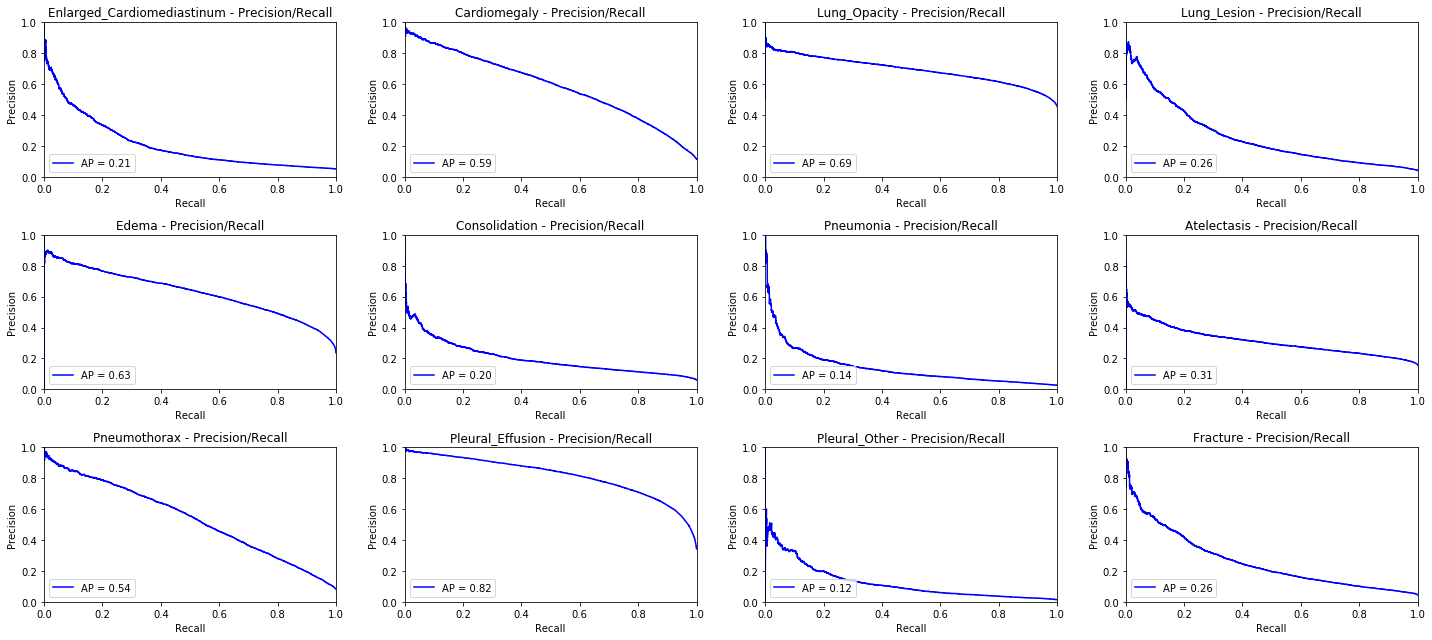


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.258422
Hamming Loss,0.110722
Combined Recall,0.301906
Combined Precision,0.386336
Combined F1,0.318210


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1393,0.091170,0.359773,0.145475,0.690764,0.154371
1,Cardiomegaly,2963,0.388795,0.579477,0.465361,0.858612,0.510891
2,Lung_Opacity,11780,0.533447,0.656979,0.588803,0.729506,0.651978
3,Lung_Lesion,1125,0.082667,0.525424,0.142857,0.760536,0.190637
4,Edema,6030,0.311443,0.651631,0.421454,0.832037,0.572352
5,Consolidation,1526,0.013106,0.714286,0.025740,0.750838,0.178164
6,Pneumonia,693,0.005772,0.222222,0.011252,0.748076,0.087937
7,Atelectasis,4041,0.022767,0.388186,0.043011,0.691618,0.269640
8,Pneumothorax,2128,0.468045,0.389824,0.425368,0.839478,0.395478
9,Pleural_Effusion,8686,0.633433,0.752668,0.687922,0.879419,0.777972


***** ROC *****


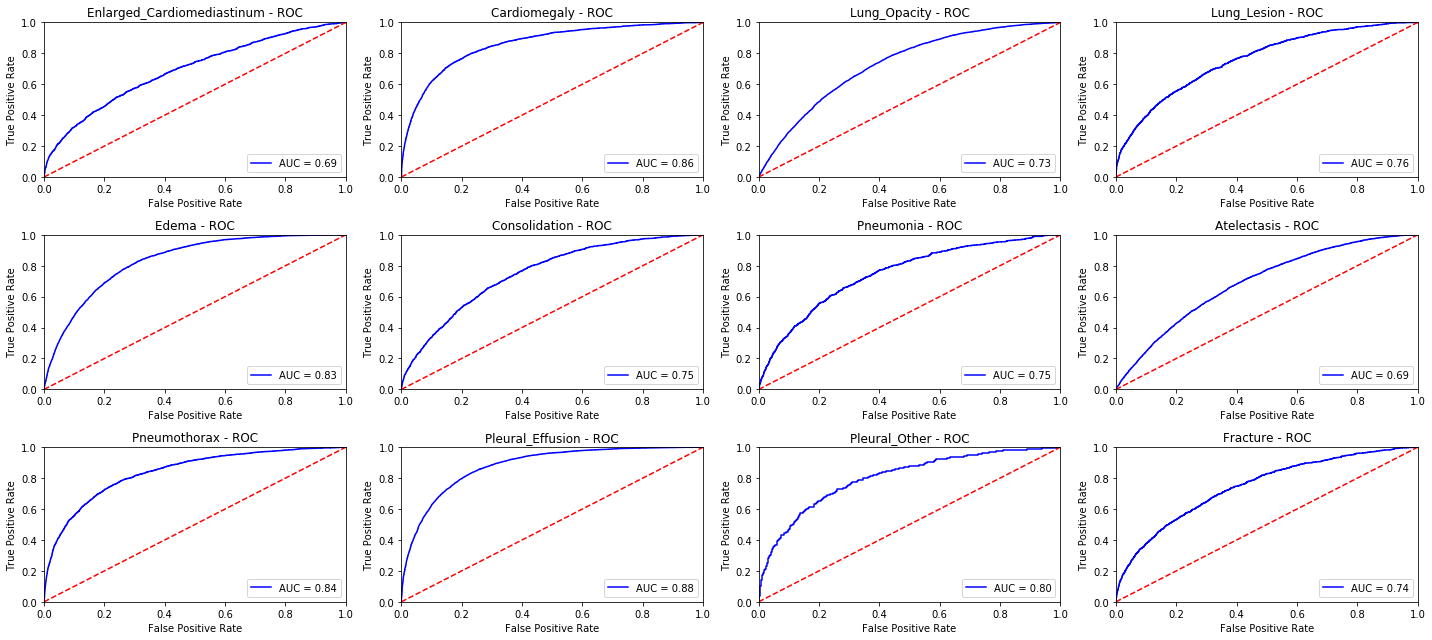

***** Precision / Recall *****


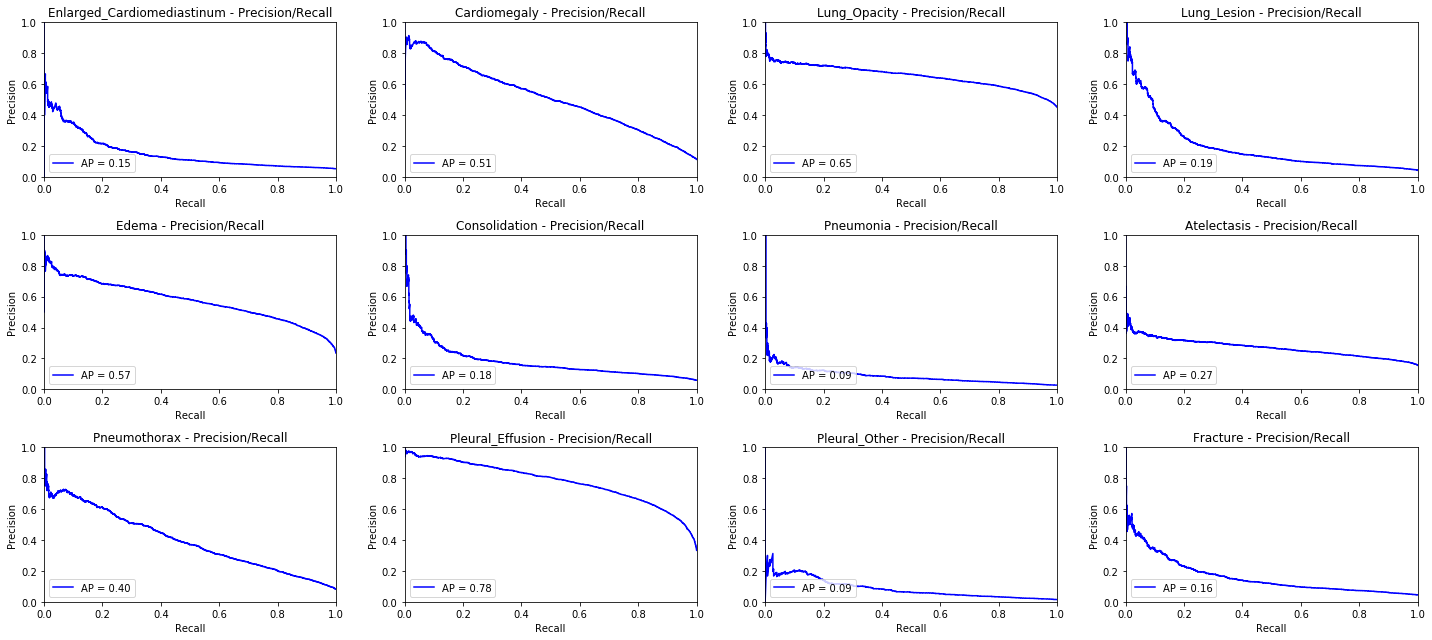

In [7]:
standardTraining.displayMetrics()